In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Aimpr\AppData\Local\Temp\ipykernel_16464\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
sample = 200

**Data 1**
--------

In [4]:
## data1 ##
np.random.seed(11)
data1_X0 = np.ones((100,1))
data1_X1 = np.random.rand(sample, 1) * 2
data1_X2 = np.random.rand(sample, 1) 
data1_y = data1_X1 * data1_X2
data1_y = np.where(data1_y >= 0.75, 0, 1)


X0_df = pd.DataFrame(data1_X0, columns=['X0'])
X1_df = pd.DataFrame(data1_X1, columns=['X1'])
X2_df = pd.DataFrame(data1_X2, columns=['X2'])


X = pd.concat([X0_df, X1_df, X2_df], axis=1)

**Data 2**
--------

In [5]:
from sklearn.datasets import make_circles

noise_level = 0.05
data2_X, data2_y = make_circles(n_samples=sample, noise=noise_level, random_state=10)


**Data 3**
--------

In [6]:
from sklearn.datasets import make_moons

noise_level = 0.1  
data3_X, data3_y = make_moons(n_samples=sample, noise=noise_level, random_state=10)

Text(0.5, 1.0, 'Data 1')

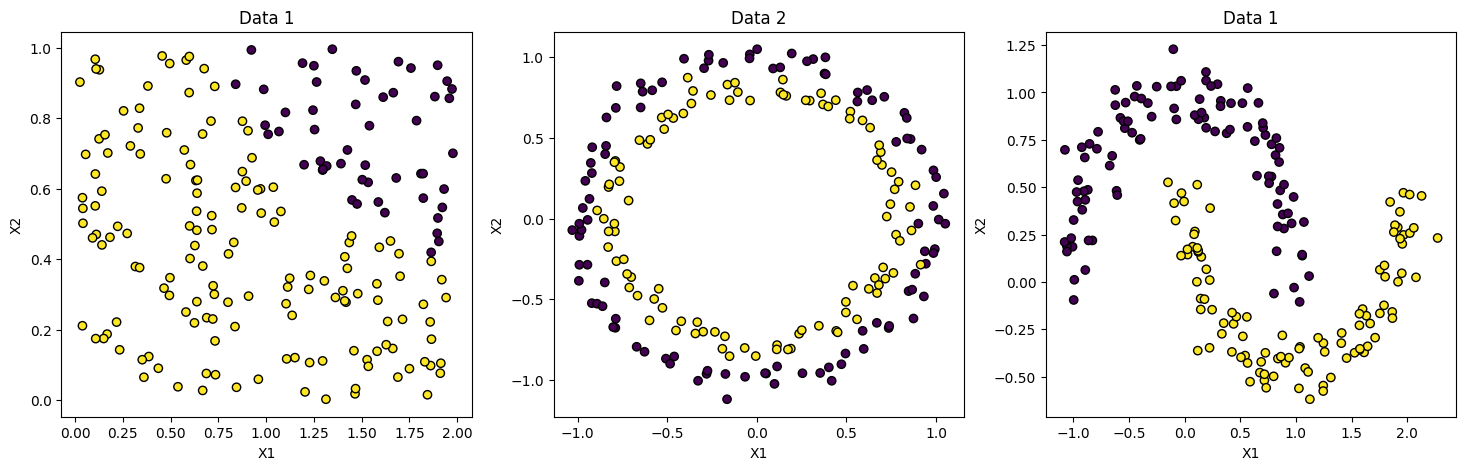

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data1_X1, data1_X2, c=data1_y.flatten(), cmap='viridis', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 1')

plt.subplot(1,3,2)
plt.scatter(data2_X[:, 0], data2_X[:, 1], c=data2_y, cmap='viridis', edgecolor='k')  # Correct indexing
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 2')

plt.subplot(1,3,3)
plt.scatter(data3_X[:, 0], data3_X[:, 1], c=data3_y, cmap='viridis', edgecolor='k')  # Correct indexing
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 1')



In [8]:
def predict(result, th):
    result_list = []
    for i in result:
        if i >= th:
            result_list.append(1)
        elif i < th:
            result_list.append(0)
    return result_list

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Hx2(W0, W1, W2, X1, X2):
    y_Predict = (W1 * X1 + W2 * X2) + W0
    return y_Predict

def Hx3(W0, W1, W2, W3, X1, X2, X3):
    y_Predict = (W1 * X1 + W2 * X2 + W3 * X3) + W0
    return y_Predict

def Hx4(W0, W1, W2, W3, W4, X1, X2, X3, X4):
    y_Predict = (W1 * X1 + W2 * X2 + W3 * X3 + W4 * X4) + W0
    return y_Predict

def Costf2(X1, X2, y, lr, iterations):
    n = len(y)
    
    W0 = 0  
    W1 = 1
    W2 = 1  
    
    cost_list = []
    W0_list = []
    W1_list = []
    W2_list = []

    for i in range(iterations):
        HX = Hx2(W0, W1, W2, X1, X2)
        HX1 = sigmoid(HX)

        cost = (-1/n) * np.sum(y * np.log(HX1) + (1 - y) * np.log(1 - HX1))
        
        dW = (HX1 - y)
        dW1_0 = dW* X1
        dW2_0 = dW* X2
        dB0 = dW

        dW1_1 = (1/n)* (np.sum(dW1_0))
        dW2_1 = (1/n)* (np.sum(dW2_0))
        dB1 = np.sum(dB0)

        result1_0 = lr * dW1_1
        result2_0 = lr * dW2_1
        result1 = lr * dB1

        W0 -= result1
        W1 -= result1_0
        W2 -= result2_0
        
        cost_list.append(cost)
        W0_list.append(W0)
        W1_list.append(W1)
        W2_list.append(W2)

        print(f"Iteration {i+1}: Cost = {cost}")
        print(f"W0 :{W0}")
        print(f"W1 :{W1}")
        print(f"W2 :{W2}")

    return cost_list, W1_list, W2_list, W0_list

def Costf3(X1, X2, X3, y, lr, iterations):
    n = len(y)
    
    W0 = 0  
    W1 = 1
    W2 = 1
    W3 = 1 
    
    cost_list = []
    W0_list = []
    W1_list = []
    W2_list = []
    W3_list = []

    for i in range(iterations):
        HX = Hx3(W0, W1, W2, W3, X1, X2, X3)
        HX1 = sigmoid(HX)

        cost = (-1/n) * np.sum(y * np.log(HX1) + (1 - y) * np.log(1 - HX1))

        dW = (HX1 - y)
        dW1_0 = dW* X1
        dW2_0 = dW* X2
        dW3_0 = dW* X3
        dB0 = dW
        #print(dW1_0, dW2_0)

        dW1_1 = (1/n)* (np.sum(dW1_0))
        dW2_1 = (1/n)* (np.sum(dW2_0))
        dW3_1 = (1/n)* (np.sum(dW3_0))
        dB1 = np.sum(dB0)
        #print(dW1_1, dW2_1)

        result1_0 = lr * dW1_1
        result2_0 = lr * dW2_1
        result3_0 = lr * dW3_1
        result1 = lr * dB1

        W0 -= result1
        W1 -= result1_0
        W2 -= result2_0
        W3 -= result3_0
        
        cost_list.append(cost)
        W0_list.append(W0)
        W1_list.append(W1)
        W2_list.append(W2)
        W3_list.append(W3)

        print(f"Iteration {i+1}: Cost = {cost}")
        print(f"W0 :{W0}")
        print(f"W1 :{W1}")
        print(f"W2 :{W2}")
        print(f"W3 :{W3}")

    return cost_list, W1_list, W2_list, W3_list, W0_list 

def Costf4(X1, X2, X3, X4, y, lr, iterations):
    n = len(y)
    
    W0 = 0  
    W1 = 1
    W2 = 1
    W3 = 1 
    W4 = 1
    
    cost_list = []
    W0_list = []
    W1_list = []
    W2_list = []
    W3_list = []
    W4_list = []

    for i in range(iterations):
        HX = Hx4(W0, W1, W2, W3, W4, X1, X2, X3, X4)
        HX1 = sigmoid(HX)

        cost = (-1/n) * np.sum(y * np.log(HX1) + (1 - y) * np.log(1 - HX1))

        dW = (HX1 - y)
        dW1_0 = dW* X1
        dW2_0 = dW* X2
        dW3_0 = dW* X3
        dW4_0 = dW* X4
        dB0 = dW
        #print(dW1_0, dW2_0)

        dW1_1 = (1/n)* (np.sum(dW1_0))
        dW2_1 = (1/n)* (np.sum(dW2_0))
        dW3_1 = (1/n)* (np.sum(dW3_0))
        dW4_1 = (1/n)* (np.sum(dW4_0))
        dB1 = np.sum(dB0)
        #print(dW1_1, dW2_1)

        result1_0 = lr * dW1_1
        result2_0 = lr * dW2_1
        result3_0 = lr * dW3_1
        result4_0 = lr * dW4_1
        result1 = lr * dB1

        W0 -= result1
        W1 -= result1_0
        W2 -= result2_0
        W3 -= result3_0
        W4 -= result4_0
        
        cost_list.append(cost)
        W0_list.append(W0)
        W1_list.append(W1)
        W2_list.append(W2)
        W3_list.append(W3)
        W4_list.append(W4)

        print(f"Iteration {i+1}: Cost = {cost}")
        print(f"W0 :{W0}")
        print(f"W1 :{W1}")
        print(f"W2 :{W2}")
        print(f"W3 :{W3}")
        print(f"W4 :{W4}")

    return cost_list, W1_list, W2_list, W3_list, W4_list, W0_list 

In [10]:
data1 = Costf2(data1_X1, data1_X2, data1_y, 0.1, 10000)

Iteration 1: Cost = 0.8129263405783712
W0 :-1.300637348561716
W1 :0.9758008531964613
W2 :0.9894526602702951
Iteration 2: Cost = 0.8810161636285766
W0 :2.575938738526224
W1 :0.9758048113681538
W2 :0.9912663248087364
Iteration 3: Cost = 1.2672910133415505
W0 :-2.229229545411199
W1 :0.9377140795396137
W2 :0.9728039351219426
Iteration 4: Cost = 1.169638577939068
W0 :6.009921251137749
W1 :0.9613751503277762
W2 :0.9856083117832639
Iteration 5: Cost = 2.133977241437544
W0 :0.8231703321895125
W1 :0.9218732447218959
W2 :0.9663087756390834
Iteration 6: Cost = 0.879624006445147
W0 :-2.2516544640900023
W1 :0.8906098145488676
W2 :0.9517132472032374
Iteration 7: Cost = 1.193561516005693
W0 :6.340346326933506
W1 :0.9165689148059133
W2 :0.965444022198607
Iteration 8: Cost = 2.1981031709596675
W0 :1.1502798660131504
W1 :0.8770554179868786
W2 :0.9461372688162099
Iteration 9: Cost = 0.9163955360356778
W0 :-2.3921212567532537
W1 :0.8440125169525565
W2 :0.930492574706931
Iteration 10: Cost = 1.273102554815

In [11]:
data2 = Costf2(data2_X[:, 0], data2_X[:, 1], data2_y, 0.01, 10000)

Iteration 1: Cost = 0.7882235254855531
W0 :-0.0021934408289430874
W1 :0.9990654452271936
W2 :0.999090485686257
Iteration 2: Cost = 0.7880516254248828
W0 :-0.0034749540985149264
W1 :0.9981316076112731
W2 :0.9981816954801476
Iteration 3: Cost = 0.7878812460950113
W0 :-0.004222456394014103
W1 :0.9971984903330802
W2 :0.9972736172989414
Iteration 4: Cost = 0.7877115593889135
W0 :-0.004657321650246518
W1 :0.9962660946591659
W2 :0.9963662434807439
Iteration 5: Cost = 0.7875422812316013
W0 :-0.0049091954628702975
W1 :0.9953344210743665
W2 :0.9954595692919049
Iteration 6: Cost = 0.7873733141017482
W0 :-0.005053986543005156
W1 :0.9944034697215066
W2 :0.9945535918297246
Iteration 7: Cost = 0.7872046244201003
W0 :-0.005136130264014139
W1 :0.993473240582395
W2 :0.9936483093032145
Iteration 8: Cost = 0.7870362005139854
W0 :-0.0051816324013085075
W1 :0.9925437335576841
W2 :0.9927437205856141
Iteration 9: Cost = 0.7868680382125421
W0 :-0.005205709454275134
W1 :0.9916149485047345
W2 :0.9918398249433479

In [12]:
data3 = Costf2(data3_X[:, 0], data3_X[:, 1], data3_y, 0.01, 10000)

Iteration 1: Cost = 0.7627375139056658
W0 :-0.3205445084448551
W1 :1.0005567618994984
W2 :0.9976214773156317
Iteration 2: Cost = 0.7212257687282625
W0 :-0.509314351054613
W1 :1.0013556384575013
W2 :0.9954088988099604
Iteration 3: Cost = 0.7066626736383015
W0 :-0.6172213569489094
W1 :1.0023227923406917
W2 :0.9933011605040601
Iteration 4: Cost = 0.7015668787671431
W0 :-0.6782809817292342
W1 :1.0033934695206992
W2 :0.9912556951926083
Iteration 5: Cost = 0.6995762704806557
W0 :-0.7127327546014222
W1 :1.0045241362925952
W2 :0.989246582583737
Iteration 6: Cost = 0.6985808981310624
W0 :-0.7321679706695992
W1 :1.005688259574359
W2 :0.9872587859815396
Iteration 7: Cost = 0.6979027067140179
W0 :-0.7431445816273132
W1 :1.006870320077833
W2 :0.9852837367325823
Iteration 8: Cost = 0.6973259710583452
W0 :-0.7493588474399607
W1 :1.0080614112175792
W2 :0.9833165853325495
Iteration 9: Cost = 0.696782261558513
W0 :-0.7528918110328716
W1 :1.0092564697000879
W2 :0.9813545945282556
Iteration 10: Cost = 0.6

In [13]:
HX_D1 = sigmoid((data1[3][-1] + data1[1][-1]*(data1_X1) + data1[2][-1]*(data1_X2)))
HX_D2 = sigmoid((data2[3][-1] + data2[1][-1]*(data2_X[:, 0]) + data2[2][-1]*(data2_X[:, 1])))
HX_D3 = sigmoid((data3[3][-1] + data3[1][-1]*(data3_X[:, 0]) + data3[2][-1]*(data3_X[:, 1])))

In [14]:
HX_D1

array([[9.99998831e-01],
       [9.99898064e-01],
       [8.61420617e-01],
       [4.75506495e-01],
       [9.70421382e-01],
       [9.35661956e-01],
       [9.93479440e-01],
       [9.71838035e-01],
       [1.13487870e-03],
       [7.38005756e-01],
       [9.95421166e-01],
       [9.99996562e-01],
       [5.16630867e-03],
       [9.26702744e-01],
       [9.90900441e-01],
       [3.89224830e-02],
       [9.99930229e-01],
       [9.99998621e-01],
       [9.90181927e-01],
       [9.99948970e-01],
       [6.95274861e-03],
       [9.58193037e-01],
       [9.99907291e-01],
       [9.98360554e-01],
       [9.99878837e-01],
       [9.99998411e-01],
       [9.29545616e-01],
       [5.67708120e-01],
       [9.99957277e-01],
       [9.99941957e-01],
       [9.97934700e-01],
       [5.60975300e-01],
       [8.26559942e-01],
       [9.99815076e-01],
       [9.97554617e-01],
       [3.24955175e-04],
       [4.72770914e-04],
       [5.52711014e-01],
       [9.79645407e-01],
       [6.66861291e-01],


Text(0.5, 1.0, 'Predict')

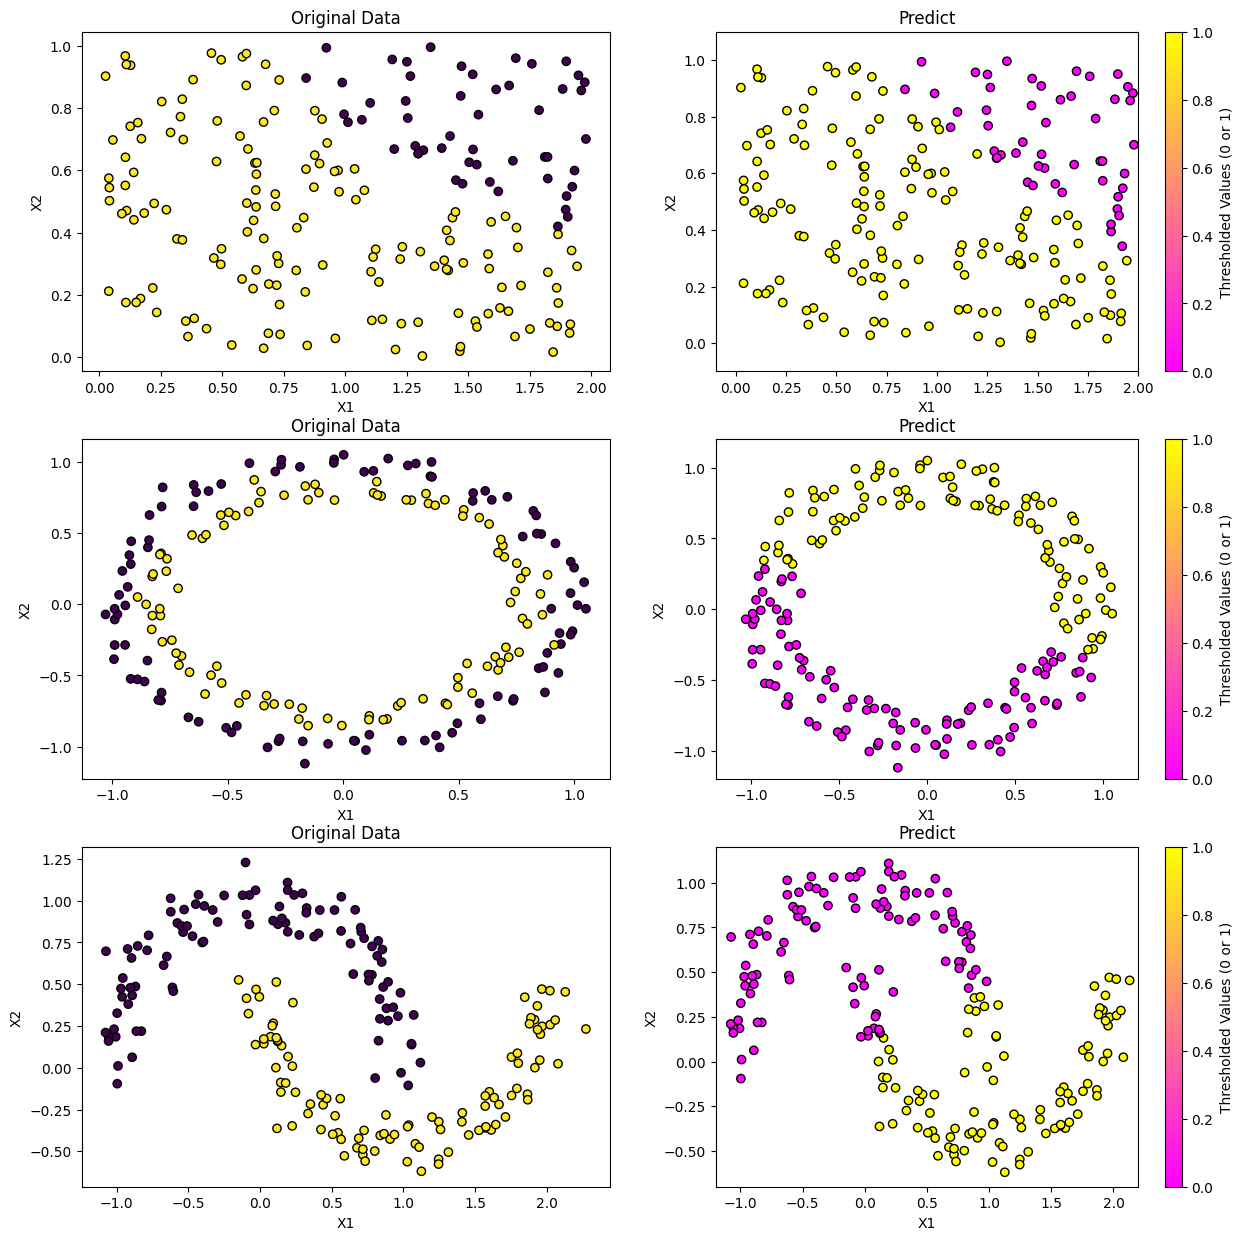

In [15]:
## X2 = -(W0 + W1X1)/W2 | X1 = -(W0 + W2X2)/W1

line = np.linspace(-5, 5, 10)

# data1_dbound1_1 = -(data1[3][-1] + data1[1][-1]*(line)) / data1[2][-1]
# data1_dbound1_2 = -(data1[3][-1] + data1[2][-1]*(line)) / data1[1][-1]

# data1_dbound2_1 = -(data2[3][-1] + data2[1][-1]*(line)) / data2[2][-1]
# data1_dbound2_2 = -(data2[3][-1] + data2[2][-1]*(line)) / data2[1][-1]

# data1_dbound3_1 = -(data3[3][-1] + data3[1][-1]*(line)) / data3[2][-1]
# data1_dbound3_2 = -(data3[3][-1] + data3[2][-1]*(line)) / data3[1][-1]

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(data1_X1, data1_X2, c=data1_y.flatten(), cmap='viridis', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')

plt.subplot(3,2,2)
plt.scatter(data1_X1, data1_X2, c=predict(HX_D1, 0.5), cmap='spring', edgecolor='k')
plt.colorbar(label='Thresholded Values (0 or 1)')
# plt.plot(line, data1_dbound1_1, 'r')
# plt.plot(line, data1_dbound1_2, 'r')
plt.xlim(-0.1, 2)
plt.ylim(-0.1, 1.1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predict')

plt.subplot(3,2,3)
plt.scatter(data2_X[:, 0], data2_X[:, 1], c=data2_y.flatten(), cmap='viridis', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')

plt.subplot(3,2,4)
plt.scatter(data2_X[:, 0], data2_X[:, 1], c=predict(HX_D2, 0.5), cmap='spring', edgecolor='k')
plt.colorbar(label='Thresholded Values (0 or 1)')
# plt.plot(line, data1_dbound2_1, 'r')
# plt.plot(line, data1_dbound2_2, 'r')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predict')

plt.subplot(3,2,5)
plt.scatter(data3_X[:, 0], data3_X[:, 1], c=data3_y.flatten(), cmap='viridis', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')

plt.subplot(3,2,6)
plt.scatter(data3_X[:, 0], data3_X[:, 1], c=predict(HX_D3, 0.5), cmap='spring', edgecolor='k')
plt.colorbar(label='Thresholded Values (0 or 1)')
# plt.plot(line, data1_dbound3_1, 'r')
# plt.plot(line, data1_dbound3_2, 'r')
plt.xlim(-1.2, 2.2)
plt.ylim(-0.7, 1.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predict')